<a href="https://colab.research.google.com/github/srinivasanibmbangalore/Deep-Learning2/blob/Version-1/SigmoidNeuron_April5_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data** : Mobile Data Set Shared by IIT Chennai Padhai - Mobile Dataset
Task :
Regression (Logistic Regression) - With thresholds, the probabilities can be converted to classification model as well (0 or 1)

Model :
Sigmoid Function It is actually a sigmoid logistic function.  𝑆𝑤,𝑏(𝑥) = 11+𝑒−(𝑤𝑥+𝑏) 

Advantages: 1.Not a linear Function : So linear separability issue kind of is eliminated 2.A smooth function : 3.Differentiable 4.The parameters to learn are w, and b. 5.As w becomes more negative, slope increases. 6.As b decreases, boundary of the curve shifts to right.

Loss Function:
Mean Square Error

Learning Algorithm:
Gradient Descent

Accuracy Evaluation:
Root Mean Square

Intermediate Visualization :
3D Projection Plots in Matplot with cmaps as virdis
######## Sometimes the default viewing angle is not optimal, in which case we can use the view_init method to set the elevation and azimuthal angles. In the following example, we'll use an elevation of 60 degrees (that is, 60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35 degrees counter-clockwise about the z-axis):


In [0]:
import numpy as np
import sklearn.datasets as ds #Very popular dataset
import pandas as pd
import matplotlib.pyplot as plt
from   mpl_toolkits import mplot3d # for plotting 3d plots
import random as rn
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.colors
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tqdm import tqdm_notebook

In [0]:
class SigmoidNeuron:

    def __init__(self):
        self.w=None
        self.b=None
    
    def perceptron(self,x):
        return np.dot(x,self.w.T)+self.b
    
    def sigmoid(self,x):
        return 1.0/(1.0+ np.exp(-x))
    
    def predict(self,X):
      Y_pred = []
      for x in X:
        y_pred=self.sigmoid(self.perceptron(x))
        Y_pred.append(y_pred)
      return np.array(Y_pred)

    
    def grad_w(self,x,y):
        y_pred=self.sigmoid(self.perceptron(x))
        grd_w= (y_pred-y)*y_pred*(1-y_pred)*x
        return grd_w
    
    def grad_b(self,x,y):
        y_pred=self.sigmoid(self.perceptron(x))
        grd_b= (y_pred-y)*y_pred*(1-y_pred)
        return grd_b
    
    def fit(self,X,Y,epochs=1,lr=1,intialize=True,display_loss=False):

        if (intialize):
            self.w = np.random.randn(1,X.shape[1]) ## W is initialized. It contains the same row as number of columns in X
            self.b=0
        if (display_loss):
          loss=[] #initialize a loss dictionary
        for i in tqdm_notebook(range(epochs), total=epochs,unit="epoch"):
            dw=0
            db=0
            for x, y in zip(X,Y):
                dw = dw+self.grad_w(x,y)
                db = db+self.grad_b(x,y)
            self.w=self.w-lr*dw
            self.b=self.b-lr*db
            Y_pred=self.sigmoid(self.perceptron(X))
            if (display_loss):
                loss.append(mean_squared_error(Y_pred,Y))
                #print(loss[i])
        print("Epochs is ",i)
        if (display_loss):
            plt.plot(loss)
            plt.xlabel('Epoch')
            plt.ylabel('Mean Squared Error loss')
            plt.show()

#### Get the data and store in google drive

The dummy data on like/dislike of phone is provided by PadhiAI( IIT Chennai)
The file is stored in Srini's mobile drive. The shareable link of the same is 
https://drive.google.com/open?id=1OqjyyMZ5kWcOnq1lJkPHmfiJ5CbqKNwl

Below is a snippet of code provided by Google Colab to read data from a Google drive




In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [0]:
shareable_link="https://drive.google.com/open?id=1OqjyyMZ5kWcOnq1lJkPHmfiJ5CbqKNwl"
myfile = drive.CreateFile({'id': '1OqjyyMZ5kWcOnq1lJkPHmfiJ5CbqKNwl'})
myfile.GetContentFile('file.csv')

In [25]:
data=pd.read_csv("file.csv")
data.head()


,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [26]:
data.shape

(341, 88)

In [0]:
X=data.drop('Rating',axis=1) # Drop the last column . This is the class label 'Rating
Y=data['Rating'].values # Y is the last column only. i.e with 'Rating' only



#### An important thing to note is that X is allways maintained as a data frame since it contains rows and columns
***Y is converted from a Dataframe to a Numpy Array since it is allways easier to manage and process.***

###### There is a need for maintaining both a binarized version of 'Y' as well as real valued value of Y since ***we*** are kind of doing binary classification

***So train the data on actual value of Y , compute the accuracy of the model using binarized value of Y***

##### So it is important to look at the values of Y closely, define. the threshold and binarize it. 

#### Introduce a new column in the original data frame with an additional column 'Class' to hold the binarized rating

In [28]:
threshold = 4.0
data['Class']=(data['Rating'] >= threshold).astype(np.int) # convert to integer as store the value
data['Class'].value_counts()

1    238
0    103
Name: Class, dtype: int64

#### Observation of the value counts, we see that class is kind of skewed
#### We will readjust the value of threshoulds and run it again

In [29]:
threshold = 4.2
data['Class']=(data['Rating'] >= threshold).astype(np.int) # convert to integer as store the value
data['Class'].value_counts(normalize=True) # normalize = True helps in looking at % value of the split

0    0.533724
1    0.466276
Name: Class, dtype: float64

##### So at threshold=4.2, we get 53% '1' value and 47% 0 value 

In [0]:
Y_binarized = data['Class'].values # Binarized values in a numpy array

#### ***Standardization of data is the next key step***
To center the data (make it have zero mean and unit standard error), you subtract the mean and then divide the result by the standard deviation.

$𝑥′$=$\frac{𝑥−𝜇}{𝜎}$

This is where you use the sklearn.preprocessor fit and fit transform methods.

You do that on the training set of data. But then you have to apply the same transformation to your testing set (e.g. in cross-validation), or to newly obtained examples before forecast. But you have to use the same two parameters 𝜇 and 𝜎 (values) that you used for centering the training set.

Hence, every sklearn's transform's fit() just calculates the parameters (e.g. 𝜇 and 𝜎 in case of StandardScaler) and saves them as an internal objects state. Afterwards, you can call its transform() method to apply the transformation to a particular set of examples.

fit_transform() joins these two steps and is used for the initial fitting of parameters on the training set 𝑥, but it also returns a transformed 𝑥′. Internally, it just calls first fit() and then transform() on the same data.

So we use the 'Standard Scaler' of sklearn preprocessor. 
The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.

### ***You should split the data between training and test data and then only standardize***

In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1,stratify=Y_binarized) # setting random_state ensures every time the code is run, results are same
print(X_train.shape, X_test.shape)

(255, 87) (86, 87)


######### In real life, you have access to only the training data. We use fit_transform() on the train data so that we learn the parameters of scaling on the train data and in the same time we scale the train data. We only use transform() on the test data because we use the scaling paramaters learned on the train data to scale the test data. i.e apply the same mean and standard deviation learnt on the training data to the test data

In [0]:
Scaler = StandardScaler()
X_scaled_train = Scaler.fit_transform(X_train)
X_scaled_test = Scaler.transform(X_test)

####### Y Variables need to be transformed in a different manner. Y varies from 0 to 1. It is a sigmoid function. So we need to use a different scaler. The trick is min has to be zero and max has to be 1. So the sklearn preprocessor is 'MinMax Scaler'.
The concept of fit_transform() and transform() all apply to MinMax Scaler also.

In [33]:
minmax_scaler = MinMaxScaler()
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1,1))
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1,1))
print(np.max(Y_scaled_train),np.min(Y_scaled_train))


1.0 0.0


###### We need to do the same for the binarized data as well.

In [34]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(1,-1)))[0][0]
print(scaled_threshold)

0.6800000000000002


########The criterion to satisfy for providing the new shape is that 'The new shape should be compatible with the original shape'

numpy allow us to give one of new shape parameter as -1 (eg: (2,-1) or (-1,3) but not (-1, -1)). It simply means that it is an unknown dimension and we want numpy to figure it out. And numpy will figure this by looking at the 'length of the array and remaining dimensions' and making sure it satisfies the above mentioned criteria

numpy.ndarray.flatten function returns a copy of an array collapsed into one dimension. The function takes the following parameters.

import numpy as np

a = np.arange(10)
print("Original array : \n", a)

a = np.arange(10).reshape(2, 5)

print("printing 2 * 5 dimentional array",a)

b= a.flatten()

print("printing Flattern array using flatten() function",b)

###### So 4.2 which was the threshold has now become 0.68 as the threshold in the binarized world.

In [35]:
Y_binarized_train = (Y_scaled_train >= scaled_threshold).astype(np.int).ravel()
print(Y_binarized_train)
Y_binarized_test = (Y_scaled_test >= scaled_threshold).astype(np.int).ravel()

[1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1
 1 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1
 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0
 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0
 1 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1]


#### Actual Fitment of Training Data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Epochs is  5499


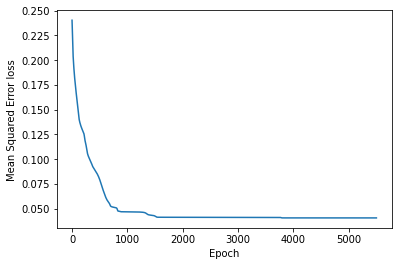

In [100]:
sn = SigmoidNeuron()
sn.fit(X_scaled_train,Y_scaled_train,epochs=5500,lr=0.01,display_loss=True)

#### The above is called the loss plot. 
### Large Drop in initial iterations. Changng the hyper parameter and modifying the lr and epoch is key

####### Predict for the training and test data set

In [0]:
Y_pred_train=sn.predict(X_scaled_train)
Y_pred_test=sn.predict(X_scaled_test)

Y_pred_binarized_train= (Y_pred_train >= scaled_threshold).astype("int").ravel()
Y_pred_binarized_test= (Y_pred_test >= scaled_threshold).astype("int").ravel()

##### Accuracy Score Computation

In [80]:
accuracy_train = accuracy_score(Y_pred_binarized_train,Y_binarized_train)
accuracy_test = accuracy_score(Y_pred_binarized_test,Y_binarized_test)
print(accuracy_train,accuracy_test)

0.7568627450980392 0.7093023255813954


###### Change the epoch and learning rate in sn.fit and see how it improves the Test and Training Accuracy. At an epoch of 2500 and learning rate of 0.02 we attain a relatively high accuracy in training and testing data set 